## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [37]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [38]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [39]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [40]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [41]:
df['converted'].mean()

0.11965919355605512

In [42]:
#The sum of users that converted over the total number of users. 
(df['converted'].value_counts()[1].sum()) / ((df['converted'].value_counts()[0]) + (df['converted'].value_counts()[1]))

0.11965919355605512

In [43]:
#using the value_counts() method to get the number of values in the group column. 
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [44]:
df['landing_page'].value_counts()

new_page    147239
old_page    147239
Name: landing_page, dtype: int64

e. The number of times the `new_page` and `treatment` don't line up.

In [45]:
df.query('group=="treatment" and landing_page != "new_page" or group=="control" and landing_page=="new_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [46]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')") 

In [48]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [49]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [50]:
#Getting the duplicted row
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [51]:
#getting the exact user user as asked for it in the question about. 
df2[df2.duplicated(['user_id'])]['user_id'].unique()

array([773192])

c. What is the row information for the repeat **user_id**? 

In [52]:
#This returns only the duplicated rows. 
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [53]:
df2.drop_duplicates(['user_id'], keep='first', inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [54]:
convert_mean = df2['converted'].mean()
convert_mean

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [55]:
#Proportion of control group converted
df2.groupby(df2['group']=='control')['converted'].mean()[1]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [56]:
#Proportion of treatment group converted
df2.groupby(df2['group']=='treatment')['converted'].mean()[1]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [57]:
#probability that an individual received the new page
len(df2.query("landing_page == 'new_page'")) / df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

<font color= green>
Based on the information from the above two proportions, we do not have evidence to support that the new page leads to more conversions. In fact, the the above proportions show that the control page has a higher conversion rate.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<font color= green>
<center>$H_{0}$: $p_{new}$ <= $p_{old}$ </center>
<center>$H_{1}$: $p_{new}$ > $p_{old}$</center>
    
<center>alpha = 0.05</center>


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [58]:
#converstion rate
Pnew = df2.converted.mean()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [59]:
#converstion rate
Pold = df2.converted.mean()
Pold

0.11959708724499628

c. What is $n_{new}$?

In [60]:
#getting the number of new page landings. 
n_new = df2[df2['landing_page']=="new_page"].count()[0]
n_new

145310

d. What is $n_{old}$?

In [61]:
#getting the number of old page landings. 
n_old = df2[df2['landing_page']=="old_page"].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [62]:
#simulating the Pnew. 
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - convert_mean), convert_mean])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [63]:
#simulating the Pold. 
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - convert_mean), convert_mean])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [64]:
new_page_converted.mean()-old_page_converted.mean()

-0.0027346863484307565

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [65]:
#running the test 10000 times and saving the results in the p_diffs array. 
'''
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - convert_mean), convert_mean])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - convert_mean), convert_mean])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())""""""
'''
new_converted_simulation = np.random.binomial(n_new, Pnew,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, Pold,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [66]:
#converting the p_diffs to a numpy array. 
p_diffs = np.array(p_diffs)


In [67]:
obs_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

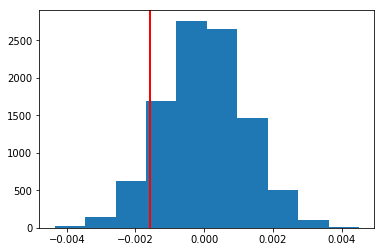

In [68]:
#plotting a histogram for the p_diffs. 
plt.hist(p_diffs);
#drawing a line to show the observed difference. 
plt.axvline(obs_diff, color='r', linewidth=2);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [69]:
#getting the p-value
(p_diffs > obs_diff).mean()

0.90480000000000005

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<font color= green>
The computed value here is the p-value, which is the probability of observing our statistic (or one more extreme in favor of the altervative) if the null hypothesis is true.
Since p-value is higher than the alpha value of 0.05, we fail to reject our null hypotheses.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [70]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [71]:
#running te ztest and getting the results in z_score and p_value variables. 
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

In [72]:
(z_score, p_value)

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<font color= green>
A z-score is a measure of how many standard deviations below or above the population mean a raw score. The z-score of -1.311 suggest that that we fail to reject the null hypotheses. In addition to, the p-value is higher than the alpha 0.05 and it also suggests that we fail to reject the null hypotheses. The conversion rate is a little higher, however, the values of the z-score and p-value agree with p-values in j. and k. and  the conclusion still holds true tha we cannot reject the null hypotheses. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<font color= green>
We will be using Logestic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [73]:
#getting the dummy variables for the group page
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
#dropping the control column. 
df2 = df2.drop('control', axis=1)
df2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [74]:
#logit regression to see the interaction between converted and ab_page. 

#insert an intercept column
df2['intercept'] = 1
#running the logit regression for the y and x variables.
lm = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
#fitting the results model. 
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [75]:
#getting a summary of the regression. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Aug 2018   Pseudo R-squ.:               8.077e-06
Time:                        23:47:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [76]:
#exponentiating the ab_page coffeciant. 
np.exp(-0.0150)

0.98511193960306265

In [85]:
#conversion of p-value here from two tailed to one-tailed test: 
(0.190/2)

0.095

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<font color= green>
The p-value associated with the ab-page is 0.190, which is different from the p-value (0.9) in the A/B test (part 2). Since the p-value is higher than the alpha 0.05 value, it suggests that the old page has a higher conversion rate than the new page.
    
In addition, the test in part 2 was a one sided test (alternative hypotheses suggested higher conversion rate for the new page), whereas the test here in part 3 is double sided test (the alternative hypothese suggests a difference between the new and the old pages) which is equavilant to 0.095 of a one tailed test, Therefore, we see a difference in both p-values. 

The alternative and null hypotheses for here are as follows: 
$$ H_0: P_{new} = P_{old} $$
$$ H_1: P_{new} \neq P_{old} $$  



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font color= green>
In order to have a complete understanding of the results and also making sure to avoid the simpson paradox, it's a good idea to take other factors into account too. For example, novelty effects and change aversion might affect the conversion rate. Next, the length of the experiment might also affect the conversion rate. Therefore, it's best to take those factor's into account before makng a final decision. 

The drawbacks of adding more factors is that it makes interpreting the coffecient's difficult, and also if we have a large dataset, then we might see the results clearly. 

In [77]:
#Getting the total duration of the experiment
df2['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')
#sorting the timestamp 
duration = df2['timestamp'].sort_values()
#subracting the earliest date from the latest.
duration[0] - duration[len(duration)-1]

Timedelta('14 days 07:41:40.548145')

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [78]:
#Reading the new dataset 
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [79]:
#combining the new (countries) dataframe with the previous one on user_id.
#we use inner merge to combine both dataframes.
df_combined = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_combined.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [80]:
#Getting dummy variable for countries and assigning them to CA, UK and US. 
df_combined[['CA','UK','US']] = pd.get_dummies(df_combined['country'])

In [81]:
#running a logit regression to see the interaction between converted and other variables metioned below. 
df_combined['intercept'] = 1
lm = sm.Logit(df_combined['converted'], df_combined[['intercept','CA','US','ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 Aug 2018   Pseudo R-squ.:               2.323e-05
Time:                        23:47:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

<font color= green>
Upon reveiwing the p-values for CA and US, we can conclude that a user's location is not statistically significant in determining a user's conversion rate. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [82]:
# Creating new  intersection columns by multiplying country and the ab_page. 
df_combined['CA_ind_ab_page'] = df_combined['CA']*df_combined['ab_page']
df_combined['US_ind_ab_page'] = df_combined['US']*df_combined['ab_page']

In [83]:
#running a logit regression to see the interaction between ab_page and location
df_combined['intercept'] = 1
lm = sm.Logit(df_combined['converted'], df_combined[['intercept','ab_page','US','CA','US_ind_ab_page','CA_ind_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 25 Aug 2018   Pseudo R-squ.:               3.482e-05
Time:                        23:47:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page            0.0108      0.023      0.475      0.635      -0.034       0.056
US                 0.0057      0.019      0.306      0.760      -0.031       0.043
CA                -0.0118      0.040     -0.296      0.767      -0.090       0.066
US_ind_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA_ind_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==================================================================================
"""

<font color= green>
The p-values for bout countries are above our specified alpha value. Therefore, The result of the logestic regression confirms that countries not useful in finding out a user's conversion rate. 

<a id='conclusions'></a>
## Conclusions:

- From the probablity test we found that the probablity of conversion was 0.50, which suggests that there no significant difference between new and old page. 
- From the A/B test, we can conclude that the conversion difference between the new and old pages is not statiscally different, therefore, it suggests failing to reject the null hypotheses. 
- We conculded the same thing through Logestic regression and found out that the p-values were not statistically significant. 
- Since the data is only for 14 days, its important to keep practicality of the new page in mind while making a decision between the new and the old page.

### Limitations: 
- Since the duration of the experiment is only 14 days, we cannot conculde with absolute certainty that the new page is not better than the old page. If we collected data for a longer term than we could have conclusive evidence to support our hypotheses. 
- Other factors such as change aversion and novelty effects might also be influencing our findings.





> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [84]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0